<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town 
Это уровень преступности на душу населения по городам
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
Это доля жилой земли, зонированной для участков более 25 000 кв. Футов.
* INDUS: This is the proportion of non-retail business acres per town.
Это доля не торговых площадей в каждом городе.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
Это фиктивная переменная реки Чарльз (она равна 1, если тракт ограничивает реку; 0 в противном случае)
* NOX: This is the nitric oxides concentration (parts per 10 million)
Это концентрация оксидов азота (частей на 10 миллионов)
* RM: This is the average number of rooms per dwelling
Это среднее количество комнат на одно дом
* AGE: This is the proportion of owner-occupied units built prior to 1940
Это доля занимаемых владельцами единиц, построенных до 1940 г.
* DIS: This is the weighted distances to five Boston employment centers
Это взвешенные расстояния до пяти бостонских бизнес центров
* RAD: This is the index of accessibility to radial highways
Это показатель доступности радиальных магистралей
* TAX: This is the full-value property-tax rate per 10,000 dollars
Это полная стоимость налога на имущество на 10000 долларов
* PTRATIO: This is the pupil-teacher ratio by town
Это соотношение учеников и учителей по городам
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
Это рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля людей афроамериканского происхождения по городам.
* LSTAT: This is the percentage lower status of the population
Это процент населения низкого статуса
* MEDV: This is the median value of owner-occupied homes in 1000 dollars
Это средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#Задание 1
Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное - INDUS, TAX
2.   Равномерное ---
3.   Биноминальное - RM, RAD
4.   Бернулли - CHAS
5.   Геометрическое - DIS
6.   Логнормальное - ZN, NOX, AGE, PTRAT, B, LSTAT, MEDV



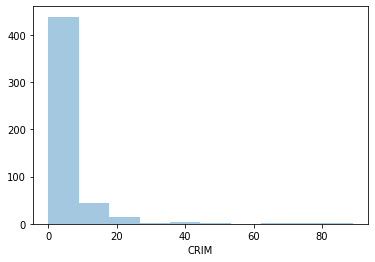

In [28]:
sns.distplot(data['CRIM'],10, kde = False)

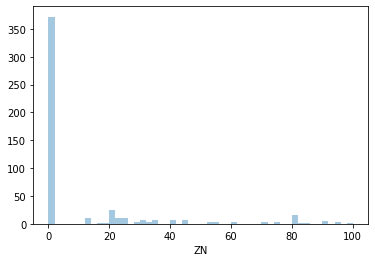

In [33]:
sns.distplot(data['ZN'],50, kde = False)

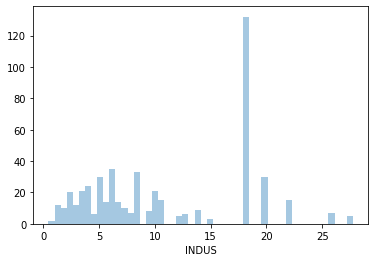

In [37]:
sns.distplot(data['INDUS'],50, kde = False)

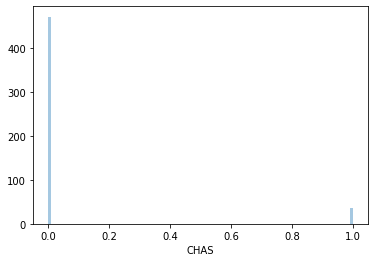

In [12]:
sns.distplot(data['CHAS'],100, kde = False)

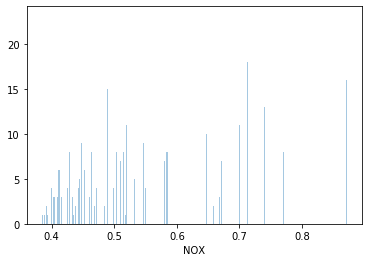

In [50]:
sns.distplot(data['NOX'],590, kde = False)

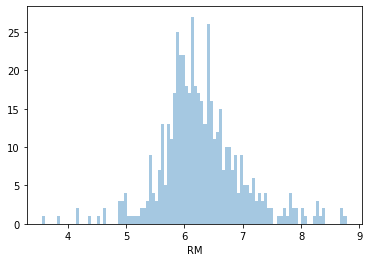

In [14]:
sns.distplot(data['RM'],100, kde = False)

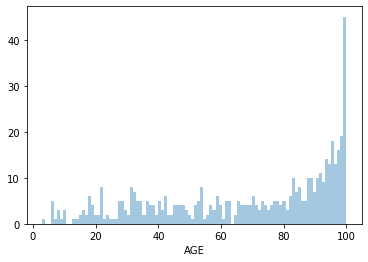

In [15]:
sns.distplot(data['AGE'],100, kde = False)

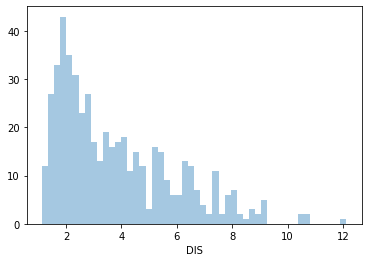

In [52]:
sns.distplot(data['DIS'],50, kde = False)

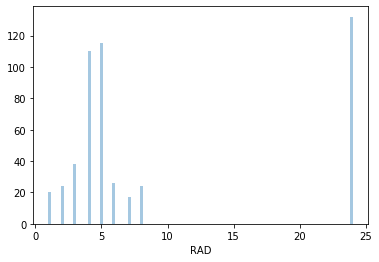

In [54]:
sns.distplot(data['RAD'],100, kde = False)

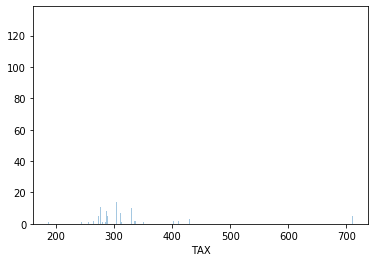

In [44]:
sns.distplot(data['TAX'],1000, kde = False)

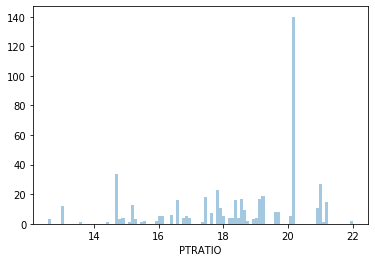

In [19]:
sns.distplot(data['PTRATIO'],100, kde = False)

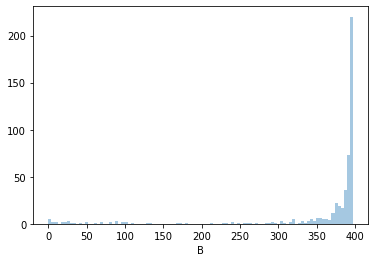

In [20]:
sns.distplot(data['B'],100, kde = False)

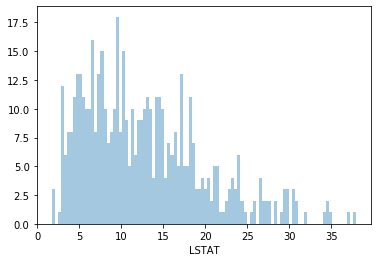

In [21]:
sns.distplot(data['LSTAT'],100, kde = False)

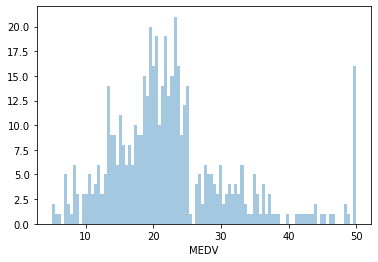

In [56]:
sns.distplot(data['MEDV'],100, kde = False)

#Задание 2
Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [57]:
#Матрица корреляций. Максимально коррелируют с ценой на дома - RM (среднее количество комнат на дом)
#и LSTAT (обратная зависимость, c процентом населения низкого статуса)
np.round_(data.corr(), decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [ ]:
#Задание 3

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [69]:
#1)
#преобразуем Series данные в numpy array 
price = data['MEDV'] 
l_people = data ['LSTAT']
price = np.array(price).reshape(-1,1)
l_people = np.array(l_people).reshape(-1,1)


from sklearn.linear_model import LinearRegression
model = LinearRegression()

#разделяю данные
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    price,
    l_people,
    test_size = 0.2
)

In [71]:
#2 обучение модели и предсказание на данных
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

In [72]:
#3ошибка модели
model.score(X_test, y_test)

0.5217124943972442

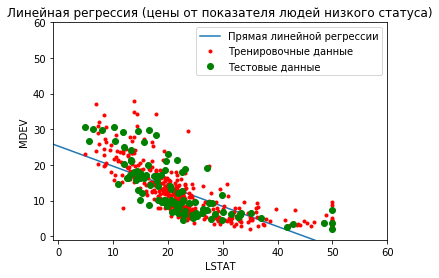

In [80]:
#4 график
plt.xlabel('LSTAT')
plt.ylabel('MDEV')
plt.title('Линейная регрессия (цены от показателя людей низкого статуса)')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-1,60, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-1,60)
plt.ylim(-1,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data1=pd.read_csv(url)
data1.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [11]:
print ('Всего отсутствует значений ', data1.isnull().sum().sum())

Всего отсутствует значений  23


In [7]:
#В выборке Country нет отсутствующих значений
data1['Country (region)'].isnull().sum()

0

Сколько стран в выборке? Написать ответ. 

In [18]:
print ('Стран в выборке', len(data1['Country (region)'].unique()))

Стран в выборке 156


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [24]:
np.round_(data1.corr(), decimals=3)
#По данной матрице 
#1)можно сделать вывод, что показатель счастья Ladder наиболее взаимосвязан:
#с показателями Соцподдержки, ВВП и уровня здравоохранения.
#2)уровень коррупции практически не коррелирует с другими показателями
#3показатели Positive и Negative также слабо зависят от других показателей выборки.

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000,0.539,0.491,0.524,0.818,0.547,0.190,0.498,0.813,0.817
SD of Ladder,0.539,1.000,0.085,0.619,0.599,0.252,0.259,0.392,0.630,0.611
Positive affect,0.491,0.085,1.000,0.390,0.386,0.682,0.210,0.355,0.305,0.333
Negative affect,0.524,0.619,0.390,1.000,0.622,0.430,0.159,0.338,0.542,0.489
Social support,0.818,0.599,0.386,0.622,1.000,0.449,0.118,0.442,0.773,0.741
Freedom,0.547,0.252,0.682,0.430,0.449,1.000,0.381,0.490,0.410,0.416
Corruption,0.190,0.259,0.210,0.159,0.118,0.381,1.000,0.266,0.199,0.123
Generosity,0.498,0.392,0.355,0.338,0.442,0.490,0.266,1.000,0.479,0.432
Log of GDP\nper capita,0.813,0.630,0.305,0.542,0.773,0.410,0.199,0.479,1.000,0.848
Healthy life\nexpectancy,0.817,0.611,0.333,0.489,0.741,0.416,0.123,0.432,0.848,1.000


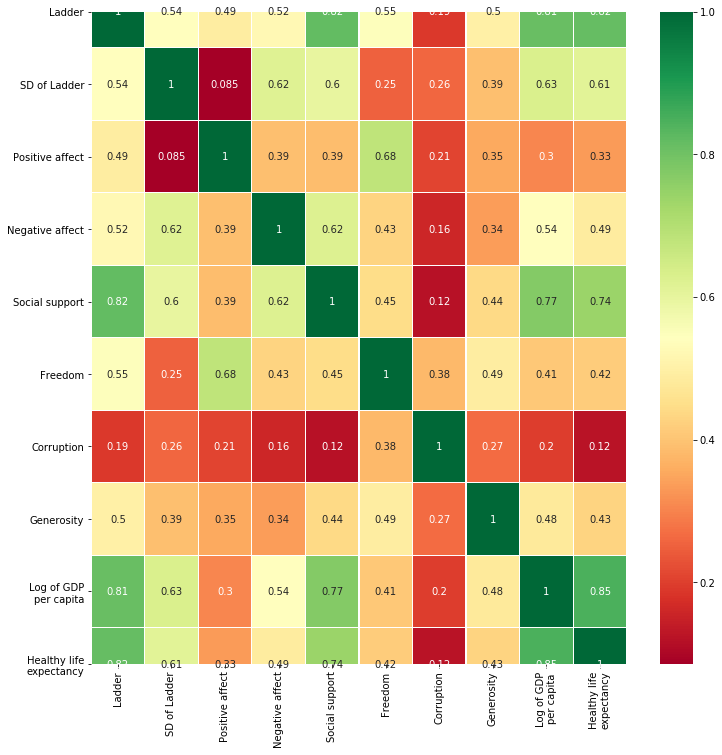

In [26]:
import seaborn as sns
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Text(0.5, 1.0, 'Подбрасывание кубика 10 раз')

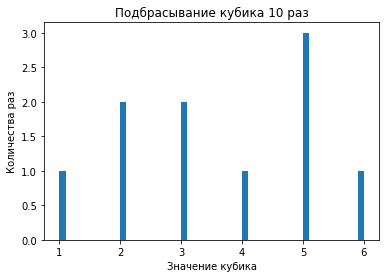

In [248]:
#данное распредение похоже на равномерное
values = np.random.randint(1, 7, size = 10)
plt.hist(values, bins = 50)
plt.xlabel('Значение кубика')
plt.ylabel('Количества раз')
plt.title('Подбрасывание кубика 10 раз')

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

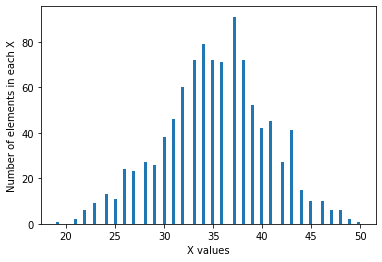

In [250]:

throw_count = 1000
for i in range(1000):
    values1[i] = np.sum(np.random.randint(1, 7, size=10))
plt.hist(values1, 100)
plt.xlabel('Значения')
plt.ylabel('Количества раз')
plt.show()

График изменился согласно действию центральной предельной теореме. Теорема сработала при сложении достаточно большого количества выборок , т.к. результаты броска кубика являются слабозависими случайными величинами,ни одна из которых не доминирует.